# Caso de Estudio

## Caso: "Estimar los niveles de obesidad en individuos de los países de México, Perú y Colombia, con base en sus hábitos alimenticios y condición física"

Julian Buitrago

15 de Abril del 2022 

##  Nivel de obesidad

En el siguiente enlace encontrarán una base de datos que permiten estimarlos niveles de obesidad en individuos de los países de México, Perú y Colombia, con base en sus hábitos alimenticios y condición física. Los datos contienen 17 atributos y 2111 registros, además, hay una variable `NObesidad` (Nivel de obesidad), que permite clasificar los datos utilizando los valores de Peso Insuficiente, Peso Normal, Nivel de Sobrepeso I, Nivel de Sobrepeso II, Obesidad Tipo I , Obesidad tipo II y Obesidad tipo III. El 77% de los datos se generaron sintéticamente utilizando la herramienta Weka y el filtro SMOTE, el 23% de los datos se recopilaron directamente de los usuarios a través de una plataforma web, la información acerca de los datos y los paper relevantes que se han creado a partir de este ejercicio lo pueden encontrar en:



[ Estimation of obesity levels based on eating habits and physical condition Data Set ](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+)

#### Las preguntas de la base de datos son:

Questions and Possible Answers

¿What is your gender?	--> Female ; Male

¿what is your age?	--> Numeric value

¿what is your height?	--> Numeric value in meters

¿what is your weight?	--> Numeric value in kilograms

¿Has a family member suffered or suffers from overweight?	--> Yes ; No

¿Do you eat high caloric food frequently?	-->  Yes ; No

¿Do you usually eat vegetables in your meals?	-->  Never ; Sometimes ; Always

¿How many main meals do you have daily?	-->  Between 1 y 2 ; Three ; More than three

¿Do you eat any food between meals?	-->  No ; Sometimes ; Frequently ; Always

¿Do you smoke?	-->   Yes ; No

¿How much water do you drink daily?	-->   Less than a liter ; Between 1 and 2 L ; More than 2 L

¿Do you monitor the calories you eat daily?	-->  Yes ; No

¿How often do you have physical activity?	--> I do not have ; 1 or 2 days ; 2 or 4 days ;4 or 5 days

¿How much time do you use technological devices such as cell phone, videogames, television, computer and others?	-->   0–2 hours ; 3–5 hours; More than 5 hours

¿how often do you drink alcohol?	-->  I do not drink;  Sometimes; Frequently; Always

¿Which transportation do you usually use?	-->Automobile; Motorbike; Bike ; Public Transportation ; Walking

#### Las variables dentro de la base de datos son:

A. The attributes related with eating habits are: 


    Frequent consumption of high caloric food (FAVC),

    Frequency of consumption of vegetables (FCVC),

    Number of main meals (NCP), 

    Consumption of food between meals (CAEC), 
    
    Consumption of water daily (CH20),
    
    Consumption of alcohol (CALC). 

B. The attributes related with the physical condition are: 


    Calories consumption monitoring (SCC), 

    Physical activity frequency (FAF), 

    Time using technology devices (TUE), 

    Transportation used (MTRANS), 

C. other variables obtained were: 

    Gender, 

    Age, 

    Height, 

    Weight. 

Finally, all data was labeled and the class variable NObesity was created with the values of: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III

### Librerias

In [5]:
#Paquetes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') # Ignore los warning que se visualizan (no se recomienda)
pd.options.display.float_format = '{:,.2f}'.format # Se usa este comando para que no aparezca la anotación cientifica
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

from __future__ import print_function
from datetime import datetime
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression # Regresión Logistica
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam # metodo para llegar al minimo adaptativo, con el fin de que tenga una tasa
# de aprendizaje que se vaya adaptando
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
import keras.backend as K
from keras.wrappers.scikit_learn import KerasClassifier
import pandas_profiling as pdp

from sklearn import linear_model
from sklearn.datasets import load_iris

### Funciones

In [6]:
# numpy acomoda las matrices cuando no coinceden las dimensiones de las matrices

#Funciones útiles
def plot_decision_boundary(func, X, y, figsize=(9, 6)): # Función para dibujar la frontera de decisión
# generar un plot donde partimos de una función, un arreglo de X (datos), y datos de variable objetivo, objeto declarado
# donde defino el tamaño del plot (figsize=(9, 6) es una tupla, donde dice que sera 9 a 6)

    amin, bmin = X.min(axis=0) - 0.1 # a este arreglo estoy restando 0.1 a cada elemento le quita 0.1, X tiene una 
    # restricción que solo puede tener dos columnas, estoy pidiendo solo dos valores (dos columnas)
    amax, bmax = X.max(axis=0) + 0.1 # e suma y se resta para que la gráfica no quede pegada a la otra
    hticks = np.linspace(amin, amax, 101) # linspace genera un arreglo desde amin a amax con una tamaño de 101
    vticks = np.linspace(bmin, bmax, 101) # linspace genera un arreglo desde amin a amax con una tamaño de 101
    
    aa, bb = np.meshgrid(hticks, vticks) 
    ab = np.c_[aa.ravel(), bb.ravel()] # np.c es una matriz de columna, genera las columnas par apoder generar
    c = func(ab)
    cc = c.reshape(aa.shape) # genero un reshape para que la grilla me quede igual 

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF']) # definir una tableta de colores
    
    fig, ax = plt.subplots(figsize=figsize)
    contour = plt.contourf(aa, bb, cc, cmap=cm, alpha=0.8)
    
    ax_c = fig.colorbar(contour)
    ax_c.set_label("$P(y = 1)$") # defino cual va a ser el label de la gráfica
    ax_c.set_ticks([0, 0.25, 0.5, 0.75, 1]) # defino un valor máximo y unvalor minimo
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright) # función de clasificación, pinta los dos valores según la función 
    # de clasificación, se evalua en todos los puntos de la grilla
    plt.xlim(amin, amax)
    plt.ylim(bmin, bmax)

def plot_multiclass_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
    cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    Z = model.predict_classes(np.c_[xx.ravel(), yy.ravel()], verbose=0)
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(8, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
def plot_data(X, y, figsize=None):
    if not figsize:
        figsize = (8, 6)
    plt.figure(figsize=figsize)
    plt.plot(X[y==0, 0], X[y==0, 1], 'or', alpha=0.5, label=0)
    plt.plot(X[y==1, 0], X[y==1, 1], 'ob', alpha=0.5, label=1)
    plt.xlim((min(X[:, 0])-0.1, max(X[:, 0])+0.1))
    plt.ylim((min(X[:, 1])-0.1, max(X[:, 1])+0.1))
    plt.legend()

def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

def plot_loss(history): # Función para guradar la historia de las perdidas y el accuracy , cp,p se comporto en el tiempo
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, historydf.values.max()))
    plt.title('Loss: %.3f' % history.history['loss'][-1])
    
def plot_confusion_matrix(model, X, y): # pintar la matrix de confusión en un mapa de calor
    y_pred = model.predict_classes(X, verbose=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', cmap='GnBu', alpha=0.8, vmin=0)

def plot_compare_histories(history_list, name_list, plot_accuracy=True):
    dflist = []
    min_epoch = len(history_list[0].epoch)
    losses = []
    for history in history_list:
        h = {key: val for key, val in history.history.items() if not key.startswith('val_')}
        dflist.append(pd.DataFrame(h, index=history.epoch))
        min_epoch = min(min_epoch, len(history.epoch))
        losses.append(h['loss'][-1])

    historydf = pd.concat(dflist, axis=1)

    metrics = dflist[0].columns
    idx = pd.MultiIndex.from_product([name_list, metrics], names=['model', 'metric'])
    historydf.columns = idx
    
    plt.figure(figsize=(6, 8))

    ax = plt.subplot(211)
    historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
    plt.title("Training Loss: " + ' vs '.join([str(round(x, 3)) for x in losses]))
    
    if plot_accuracy:
        ax = plt.subplot(212)
        historydf.xs('acc', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
        plt.title("Accuracy")
        plt.xlabel("Epochs")
    
    plt.xlim(0, min_epoch-1)
    plt.tight_layout()
    
def make_sine_wave():
    c = 3
    num = 2400
    step = num/(c*4)
    np.random.seed(0)
    x0 = np.linspace(-c*np.pi, c*np.pi, num)
    x1 = np.sin(x0)
    noise = np.random.normal(0, 0.1, num) + 0.1
    noise = np.sign(x1) * np.abs(noise)
    x1  = x1 + noise
    x0 = x0 + (np.asarray(range(num)) / step) * 0.3
    X = np.column_stack((x0, x1))
    y = np.asarray([int((i/step)%2==1) for i in range(len(x0))])
    return X, y

def make_multiclass(N=500, D=2, K=3):
    """
    N: number of points per class
    D: dimensionality
    K: number of classes
    """
    np.random.seed(0)
    X = np.zeros((N*K, D))
    y = np.zeros(N*K)
    for j in range(K):
        ix = range(N*j, N*(j+1))
        # radius
        r = np.linspace(0.0,1,N)
        # theta
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    fig = plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    return X, y

In [7]:
# Utilizar el backend del cuaderno
%matplotlib inline 

In [8]:
import random 
random.seed(4) 

### Base de datos

In [9]:
DataO=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

## Exploración de datos
En esta sección es hacer un EDA sobre la base.

In [10]:
# Al revisar las variables, se observa que las variables que son categoricas tienen decimales que son residuos del proceso 
# de smote, con lo cual, se redondean para obtener valores enteros
DataO[DataO.columns[[1,6,7,10,12,13]]]=DataO[DataO.columns[[1,6,7,10,12,13]]].round() 
DataO.sample(6)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1988,Female,26.00,1.59,110.64,yes,yes,3.00,3.00,Sometimes,no,3.00,no,0.00,0.00,Sometimes,Public_Transportation,Obesity_Type_III
1595,Male,24.00,1.87,121.83,yes,yes,3.00,3.00,Sometimes,no,2.00,no,1.00,0.00,Sometimes,Public_Transportation,Obesity_Type_II
836,Female,31.00,1.69,71.93,yes,yes,3.00,3.00,Sometimes,no,2.00,no,1.00,1.00,Sometimes,Automobile,Overweight_Level_I
134,Male,30.00,1.77,109.00,yes,yes,3.00,3.00,Sometimes,no,1.00,no,2.00,0.00,Sometimes,Automobile,Obesity_Type_I
1135,Female,22.00,1.48,62.89,yes,no,2.00,2.00,Sometimes,no,2.00,no,0.00,1.00,no,Public_Transportation,Overweight_Level_II
336,Male,20.00,1.70,65.00,no,yes,2.00,3.00,Sometimes,no,2.00,no,0.00,1.00,no,Public_Transportation,Normal_Weight


Definimos dentro del dataset a las variables que son categoricas

In [11]:
DataO['FAVC'] = DataO['FAVC'].astype(object)
DataO['FCVC'] = DataO['FCVC'].astype(object)
DataO['NCP'] = DataO['NCP'].astype(object)
DataO['CH2O'] = DataO['CH2O'].astype(object)
DataO['FAF'] = DataO['FAF'].astype(object)
DataO['TUE'] = DataO['TUE'].astype(object)
DataO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   object 
 7   NCP                             2111 non-null   object 
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   object 
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Realizamos una exploración de los datos

In [12]:
DataO.describe()

,Age,Height,Weight
count,"2,111.00","2,111.00","2,111.00"
mean,24.32,1.70,86.59
std,6.36,0.09,26.19
min,14.00,1.45,39.00
25%,20.00,1.63,65.47
50%,23.00,1.70,83.00
75%,26.00,1.77,107.43
max,61.00,1.98,173.00


In [13]:
pdp.ProfileReport(DataO)

In [14]:
DataO.groupby('Gender').mean()

,Age,Height,Weight
Gender,,,
Female,24.00,1.64,82.30
Male,24.62,1.76,90.77


## Nivel de obesidad

Es claro que la altura y el peso son determinantes en el Nivel de obesidad, como lo muestra el siguiente gráfico:

<AxesSubplot:xlabel='Weight', ylabel='Height'>

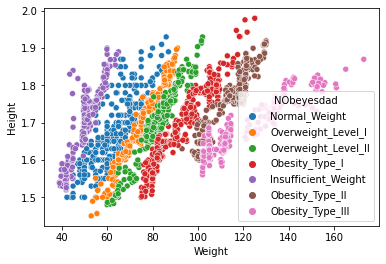

In [15]:
import seaborn as sns
sns.scatterplot(data=DataO,x='Weight',y='Height',hue='NObeyesdad')

In [16]:
DataO.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
797,Male,18.00,1.75,80.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,0.00,0.00,no,Public_Transportation,Overweight_Level_I
839,Male,20.00,1.82,85.00,yes,yes,3.00,3.00,Sometimes,no,3.00,no,2.00,0.00,Sometimes,Public_Transportation,Overweight_Level_I
1455,Female,18.00,1.69,90.02,yes,yes,3.00,3.00,Sometimes,no,2.00,no,2.00,0.00,Sometimes,Public_Transportation,Obesity_Type_I
21,Female,52.00,1.69,87.00,yes,yes,3.00,1.00,Sometimes,yes,2.00,no,0.00,0.00,no,Automobile,Obesity_Type_I
278,Female,32.00,1.57,57.00,yes,yes,3.00,3.00,Sometimes,no,2.00,no,0.00,0.00,Sometimes,Automobile,Normal_Weight


In [17]:
Data1 = DataO.drop(DataO.columns[[2, 3]],1)
Data2 = DataO.drop(DataO.columns[[2, 3]],1) 
Data3 = DataO.drop(DataO.columns[[2, 3]],1)

Convertimos la variable NObeyesdad a categoria de números:
Insufficient Weight = 0 , Normal Weight = 1 , Overweight Level I = 2 , Overweight Level II = 3 , Obesity Type I = 4 , Obesity Type II = 5 , Obesity Type III = 6

In [18]:
Data1=Data1.replace(['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I' , 'Obesity_Type_II' , 'Obesity_Type_III'], [0,1,2,3,4,5,6]) # Insufficient Weight = 0 , Normal Weight = 1 , Overweight Level I = 2 , Overweight Level II = 3 , Obesity Type I = 4 , Obesity Type II = 5 , Obesity Type III = 6
Data2=Data2.replace(['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I' , 'Obesity_Type_II' , 'Obesity_Type_III'], [0,1,2,3,4,5,6]) # Insufficient Weight = 0 , Normal Weight = 1 , Overweight Level I = 2 , Overweight Level II = 3 , Obesity Type I = 4 , Obesity Type II = 5 , Obesity Type III = 6
Data3=Data3.replace(['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I' , 'Obesity_Type_II' , 'Obesity_Type_III'], [0,1,2,3,4,5,6]) # Insufficient Weight = 0 , Normal Weight = 1 , Overweight Level I = 2 , Overweight Level II = 3 , Obesity Type I = 4 , Obesity Type II = 5 , Obesity Type III = 6

In [19]:
Data1.sample(5)

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1004,Male,18.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,1.00,1.00,no,Public_Transportation,3
1300,Female,23.00,yes,yes,3.00,1.00,Sometimes,no,3.00,no,1.00,1.00,no,Public_Transportation,4
1203,Female,19.00,yes,no,3.00,3.00,Sometimes,no,1.00,no,1.00,1.00,no,Public_Transportation,3
1842,Female,26.00,yes,yes,3.00,3.00,Sometimes,no,3.00,no,0.00,0.00,Sometimes,Public_Transportation,6
818,Male,19.00,yes,yes,2.00,2.00,Sometimes,no,2.00,no,1.00,1.00,Frequently,Public_Transportation,2



**¿Tiene sentido haber extraido esas variables? ¿Cómo afectará a mi investigación no tenerlas en cuenta?**

<AxesSubplot:>

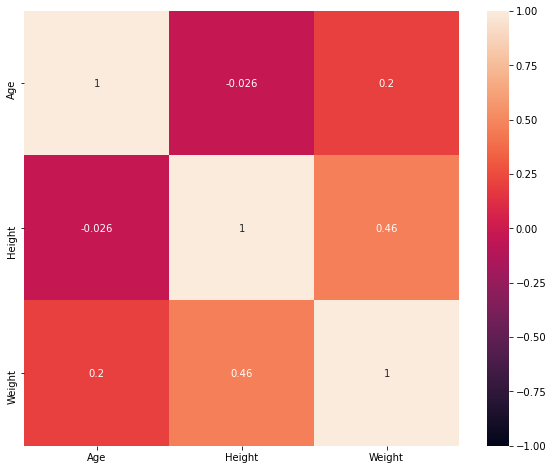

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(DataO.corr(), annot=True, square=True, vmin=-1, vmax=1)

Tiene sentido extraer las variables debido a que el indice de obesidad esta calculado directamente con la estatura y el peso, dicho de otro modo, utiliza estas dos variables para calcular la variable de "NObeysdad".
Con lo cual, podemos extraer estas dos variables; ademas, las variables de "Height" y "Weight" estan ligeramente correlacionadas, con 0.46, dicho de otro modo, si la altura de un individuo aumenta, su peso tambien lo hara.

## Aprendizaje Supervisado

En esta sección crearemos modelos que permitan responder la pregunta inicial:

1. Particionan la base en 2 (Entrenamiento y testeo) (80/20) de nuevo con semilla fija.

In [21]:
Data2.sample(5)

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1113,Male,18.00,yes,yes,3.00,3.00,Sometimes,no,2.00,no,2.00,1.00,Sometimes,Public_Transportation,3
1936,Female,23.00,yes,yes,3.00,3.00,Sometimes,no,2.00,no,0.00,1.00,Sometimes,Public_Transportation,6
828,Female,22.00,yes,yes,2.00,1.00,Sometimes,no,2.00,no,2.00,0.00,Sometimes,Public_Transportation,2
1134,Female,21.00,yes,no,2.00,2.00,Sometimes,no,2.00,no,2.00,1.00,no,Public_Transportation,3
1611,Male,25.00,yes,yes,3.00,3.00,Sometimes,no,3.00,no,2.00,1.00,Sometimes,Public_Transportation,5


In [22]:
# Data2['TUE'].unique() # Identifico cuales son los valores unicos
# Remplazo por columna los valores que tiene el dataset, por otros valores
Data2['FCVC'] = Data2['FCVC'].replace([1,2,3], ['Never','Sometimes','Always'])
Data2['NCP'] = Data2['NCP'].replace([1,2,3,4], ['one_meals','two_meals','three_meals','more_than_three'])
Data2['CH2O'] = Data2['CH2O'].replace([1,2,3], ['Less_liter','Between_1_and_2','More_than_three_L'])
Data2['FAF'] = Data2['FAF'].replace([0,1,2,3], ['not_have','1_or_2_days','2_or_4_days','4_or_5_days'])
Data2['TUE'] = Data2['TUE'].replace([0,1,2], ['0-2_hours','3-5_hour','more_than_5_hour'])
Data2.sample(7)

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1436,Female,23.00,yes,yes,Always,one_meals,Sometimes,no,More_than_three_L,no,not_have,0-2_hours,Sometimes,Public_Transportation,4
558,Male,17.00,yes,yes,Always,more_than_three,Sometimes,no,Between_1_and_2,no,2_or_4_days,3-5_hour,no,Automobile,0
956,Male,23.00,yes,yes,Sometimes,three_meals,Sometimes,no,Less_liter,no,not_have,3-5_hour,Sometimes,Automobile,2
899,Male,21.00,yes,yes,Sometimes,more_than_three,Sometimes,no,Between_1_and_2,no,1_or_2_days,0-2_hours,Sometimes,Public_Transportation,2
1801,Female,18.00,yes,yes,Always,three_meals,Sometimes,no,More_than_three_L,no,2_or_4_days,3-5_hour,Sometimes,Public_Transportation,6
2087,Female,26.00,yes,yes,Always,three_meals,Sometimes,no,More_than_three_L,no,not_have,0-2_hours,Sometimes,Public_Transportation,6
873,Female,40.00,yes,yes,Sometimes,three_meals,Sometimes,no,More_than_three_L,no,1_or_2_days,0-2_hours,Sometimes,Automobile,2


In [23]:
Data2.shape

(2111, 15)

In [24]:
# Colocar los datos tipo binario
# Variables categoricas en binario
categorical_features = ['Gender','family_history_with_overweight', 'FAVC','FCVC','NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS']

In [25]:
Data2_cat = pd.get_dummies(Data2[categorical_features])

In [26]:
Data2 = Data2.drop(categorical_features, axis=1)
Data2 = pd.concat([Data2['NObeyesdad'], Data2_cat], axis=1)
Data2.head()

,NObeyesdad,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,FCVC_Always,FCVC_Never,FCVC_Sometimes,NCP_more_than_three,NCP_one_meals,NCP_three_meals,NCP_two_meals,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,CH2O_Between_1_and_2,CH2O_Less_liter,CH2O_More_than_three_L,SCC_no,SCC_yes,FAF_1_or_2_days,FAF_2_or_4_days,FAF_4_or_5_days,FAF_not_have,TUE_0-2_hours,TUE_3-5_hour,TUE_more_than_5_hour,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
1,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
2,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,2,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,3,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0


In [27]:
#Data2['Age'].unique()

Para definir el perceptrón debe tener entradas numéricas, no obstante, aplicamos una forma de volver numérica una variable categórica es usando variables dummies:

In [28]:
# genero las báses de datos de entrenamiento y de testeo
X = Data2.drop('NObeyesdad', axis=1).values # Extraigo la variable 'NObeyesdad'

In [29]:
y = np.asarray(pd.get_dummies(Data2['NObeyesdad']).values).astype('float32')
print(X.shape, y.shape)

(2111, 40) (2111, 7)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
# estratificar que me queden igual entre valores 

(1688, 40) (1688, 7) (423, 40) (423, 7)


In [31]:
y_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

2. Usando la base de entrenamiento crearán algunos modelos de clasificación con los siguientes métodos:

* Regresión Logística
* Arboles de decisión
* Red neuronal

###  Red neuronal

In [32]:
def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

Finalmente construimos una Red Neuronal para la regresión. Se va a pasar de un modelo lineal a un modelo profundo solo agregando nuevas capas con funciones de activación no lineales.

Agregamos nuevas capas con activación relu. La trama de pérdidas parece interesante ahora. La pérdida de error de entrenamiento todavía parece estar disminuyendo, pero el error de validación comienza a aumentar después de la quinta época. 

In [33]:
mul_clas = Sequential()
mul_clas.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
mul_clas.add(Dense(32, activation='relu'))
mul_clas.add(Dense(16, activation='relu'))
mul_clas.add(Dense(7, activation='softmax'))
mul_clas.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
history = mul_clas.fit(X_train, y_train, epochs=1000, verbose=0)

<Figure size 576x432 with 0 Axes>

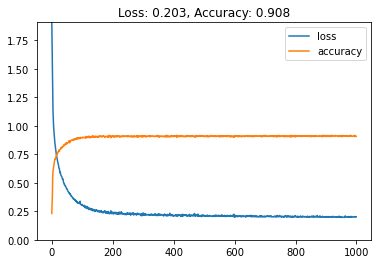

In [35]:
plot_loss_accuracy(history)

El resultado muestra que el modelo usando una Red Neuronal dio una precisión del 90,10%.

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        65
           1       0.54      0.51      0.52        57
           2       0.50      0.60      0.54        57
           3       0.67      0.53      0.59        55
           4       0.67      0.57      0.61        67
           5       0.72      0.89      0.80        53
           6       0.97      1.00      0.99        69

    accuracy                           0.70       423
   macro avg       0.69      0.69      0.68       423
weighted avg       0.70      0.70      0.69       423



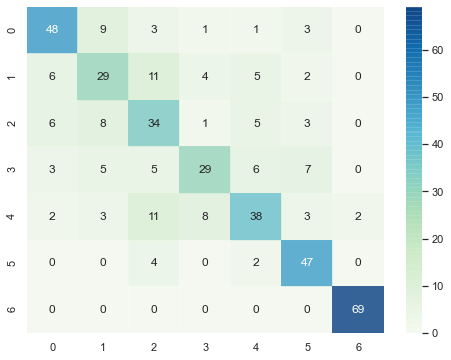

In [51]:
y_pred_class = np.argmax(mul_clas.predict(X_test, verbose=0),axis=1)
y_test_class = np.argmax(y_test, axis=1)
def plot_confusion_matrix(model, X, y):
    y_pred=np.argmax(mul_clas.predict(X, verbose=0),axis=1)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', cmap='GnBu', alpha=0.8, vmin=0)

print(classification_report(y_test_class, y_pred_class))
plot_confusion_matrix(mul_clas, X_test, y_test_class)

### Regresión Logística

El modelo lineal no tendrá función de activación y la función de pérdida será el Error cuadrático medio:

In [37]:
Data3.sample(5)

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1561,Male,31.00,yes,yes,2.00,4.00,Sometimes,no,2.00,no,1.00,0.00,no,Automobile,5
769,Male,21.00,yes,yes,2.00,3.00,Sometimes,no,3.00,no,2.00,0.00,Sometimes,Public_Transportation,2
1730,Male,31.00,yes,yes,2.00,3.00,Sometimes,no,1.00,no,1.00,0.00,Sometimes,Public_Transportation,5
836,Female,31.00,yes,yes,3.00,3.00,Sometimes,no,2.00,no,1.00,1.00,Sometimes,Automobile,2
1588,Male,25.00,yes,yes,1.00,3.00,Sometimes,no,2.00,no,1.00,0.00,Sometimes,Public_Transportation,5


In [38]:
#Data3['MTRANS'].unique()
Data3['family_history_with_overweight'] = Data3['family_history_with_overweight'].replace(['yes', 'no'], [1,0])
Data3['FAVC'] = Data3['FAVC'].replace(['yes', 'no'], [1,0])
Data3['CAEC'] = Data3['CAEC'].replace(['no', 'Sometimes', 'Frequently', 'Always'], ['0','1','2','3'])
Data3['SMOKE'] = Data3['SMOKE'].replace(['yes', 'no'], [1,0])
Data3['SCC'] = Data3['SCC'].replace(['yes', 'no'], [1,0])
Data3['CALC'] = Data3['CALC'].replace(['no', 'Sometimes', 'Frequently', 'Always'], [0,1,2,3])
Data3['MTRANS']= Data3['MTRANS'].replace(['Automobile', 'Motorbike', 'Bike', 'Public_Transportation', 'Walking'], [0,1,2,3,4]) # no = 0 ; Sometimes = 1 ; Frequently = 2 ; Always = 3
Data3['Gender'] = Data3['Gender'].replace(['Female','Male'],[0,1]) # Female = 0, Male = 1

In [39]:
Data3.sample(10)

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1356,0,39.00,1,1,2.00,3.00,1,0,1.00,0,0.00,0.00,1,0,4
763,1,21.00,0,1,2.00,1.00,0,0,3.00,0,1.00,0.00,1,3,2
345,1,17.00,0,1,3.00,3.00,3,0,2.00,0,3.00,1.00,1,3,1
1975,0,26.00,1,1,3.00,3.00,1,0,3.00,0,0.00,0.00,1,3,6
2097,0,26.00,1,1,3.00,3.00,1,0,2.00,0,0.00,1.00,1,3,6
934,1,20.00,1,1,2.00,4.00,1,0,3.00,0,2.00,0.00,1,3,2
1136,1,20.00,1,1,2.00,3.00,1,0,3.00,0,2.00,0.00,1,3,3
790,1,19.00,0,1,2.00,1.00,1,0,3.00,0,1.00,1.00,1,3,2
978,1,22.00,1,1,2.00,2.00,1,0,2.00,0,1.00,0.00,1,3,3
749,1,21.00,0,1,1.00,3.00,0,0,2.00,0,1.00,0.00,1,3,2


<AxesSubplot:>

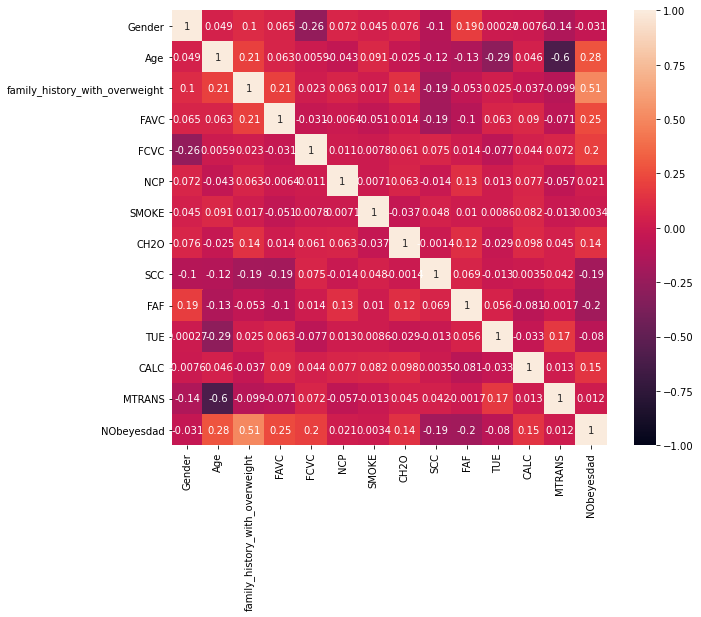

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(Data3.corr(), annot=True, square=True, vmin=-1, vmax=1)

In [41]:
# genero las báses de datos de entrenamiento y de testeo
X_logis = Data3.drop('NObeyesdad', axis=1).values # Extraigo la variable 'NObeyesdad'
y_logis = Data3['NObeyesdad'].values
X_train_logis, X_test_logis, y_train_logis, y_test_logis = train_test_split(X_logis, y_logis, test_size=0.2, random_state=0)
print(X_train_logis.shape, y_train_logis.shape, X_test_logis.shape, y_test_logis.shape)
# estratificar que me queden igual entre valores 

(1688, 14) (1688,) (423, 14) (423,)


In [74]:
#y_test_logis

* Defino el modelo y ajusto hiperparámetros

In [42]:
# Modelo de aprendizaje supervisado
#OBJETIVO: Optimizar una suma de cuadradados, llevarlo a un valor minimo

Reg_logistica=linear_model.LogisticRegression(max_iter=100,solver='liblinear',random_state=29).fit(X_logis, y_logis)

# Defino que el maximo de iteraciones es de 100 veces, y se define en random_state= la semilla que se definio al inicio.}

# solver='liblinear' Hace referencia a la forma más sencilla de Optimizar una suma de cuadradados, llevarlo a un valor minimo, se hade entender
# la matematica del problema para ver que modelo es el más adecuado, a esto se le llama ajuste de hiperparametros.

In [43]:
Reg_logistica.score(X_logis, y_logis)

0.5646612979630506

El resultado muestra que el modelo de regresión logística dio una precisión del 56,46%.

In [44]:
print(classification_report(y_test_logis,Reg_logistica.predict(X_test_logis)))

              precision    recall  f1-score   support

           0       0.56      0.57      0.56        65
           1       0.37      0.28      0.32        57
           2       0.63      0.30      0.40        57
           3       0.44      0.20      0.28        55
           4       0.53      0.70      0.61        67
           5       0.53      0.87      0.66        53
           6       0.79      1.00      0.88        69

    accuracy                           0.57       423
   macro avg       0.55      0.56      0.53       423
weighted avg       0.56      0.57      0.54       423



In [45]:
CM=confusion_matrix(y_test_logis,Reg_logistica.predict(X_test_logis))
CM

array([[37, 14,  3,  1,  7,  3,  0],
       [20, 16,  6,  5,  4,  3,  3],
       [ 2,  9, 17,  1, 10, 10,  8],
       [ 5,  3,  1, 11, 17, 17,  1],
       [ 2,  1,  0,  3, 47,  8,  6],
       [ 0,  0,  0,  4,  3, 46,  0],
       [ 0,  0,  0,  0,  0,  0, 69]], dtype=int64)

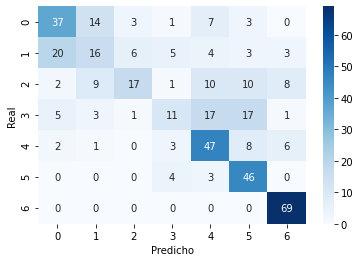

In [46]:
labels=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I' , 'Obesity_Type_II' , 'Obesity_Type_III']
sns.heatmap(CM,annot=True,cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
#plt.xticks([0.5,1.5,2.5,3.5,4,5,5.5],labels,va='center')
#plt.yticks([0.5,1.5,2.5,3.5,4,5,5.5],labels,va='center')
plt.show()

### Arboles de decisión

In [47]:
import matplotlib.pyplot as plt #para dibujar graficas 
import seaborn as sns; sns.set()
from sklearn.tree import DecisionTreeClassifier # para construir el arbol de clasificacion
from sklearn.tree import plot_tree #para dibujar el arbol de clasificacion 
from sklearn.model_selection import train_test_split # dividir los datos en el set de entrenamiento y prueba 
from sklearn.model_selection import cross_val_score # para hacer una validacion cruzada
from sklearn.metrics import confusion_matrix # para crear la matriz de confusion 
from sklearn.metrics import plot_confusion_matrix #para mostrar la matriz de confusion 

In [48]:
#create a desucuibt tree abd fit it to the training data 
clf_dt_n = DecisionTreeClassifier()
clf_dt_n = clf_dt_n.fit(X_train,y_train)

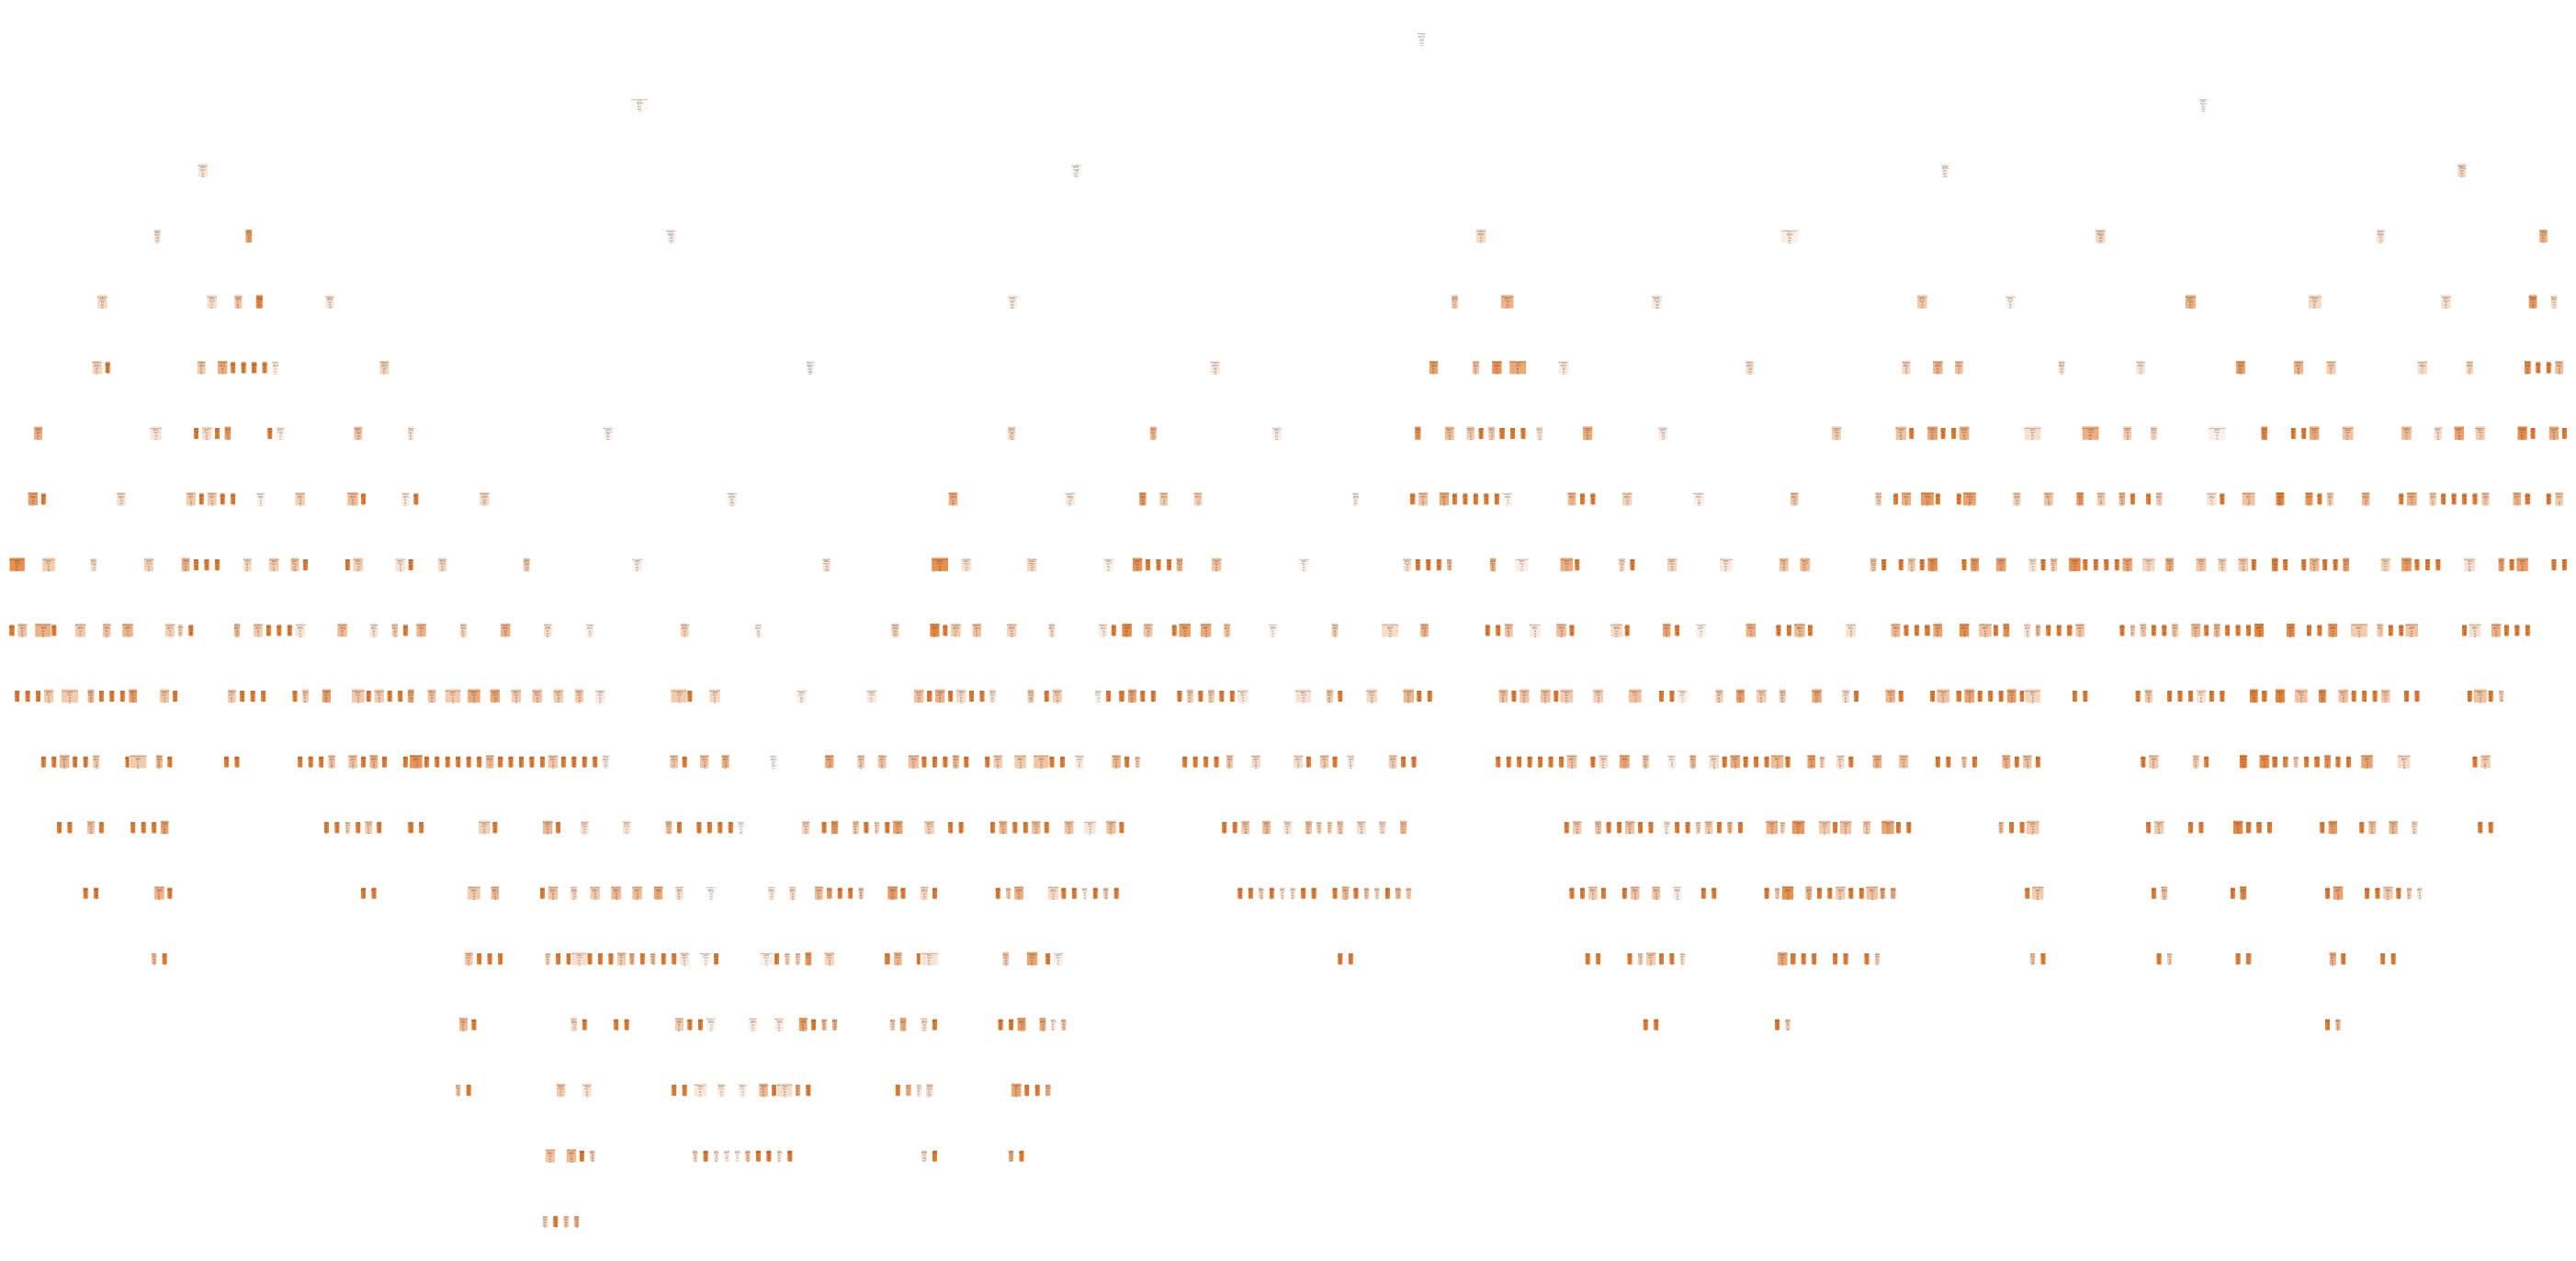

In [52]:
#see the decisiont tree
plt.figure(figsize=(50,25))
plot_tree(clf_dt_n,
         filled=True,
         rounded=True,
         class_names=['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II','Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II','Obesity_Type_III'],
         feature_names=Data2.columns);

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        65
           1       0.54      0.51      0.52        57
           2       0.50      0.60      0.54        57
           3       0.67      0.53      0.59        55
           4       0.67      0.57      0.61        67
           5       0.72      0.89      0.80        53
           6       0.97      1.00      0.99        69

    accuracy                           0.70       423
   macro avg       0.69      0.69      0.68       423
weighted avg       0.70      0.70      0.69       423



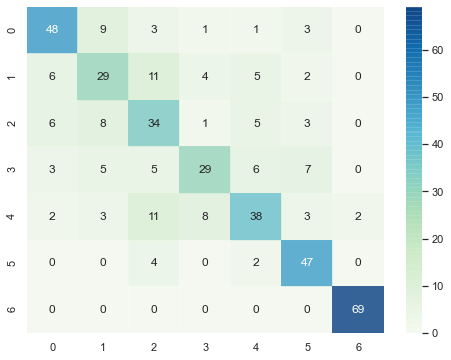

In [53]:
y_pred_class = np.argmax(mul_clas.predict(X_test, verbose=0),axis=1)
y_test_class = np.argmax(y_test, axis=1)
def plot_confusion_matrix(model, X, y):
    y_pred=np.argmax(mul_clas.predict(X, verbose=0),axis=1)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', cmap='GnBu', alpha=0.8, vmin=0)

print(classification_report(y_test_class, y_pred_class))
plot_confusion_matrix(mul_clas, X_test, y_test_class)

In [86]:
Data4 = Data3

In [89]:
Data4.sample(3)

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1842,0,26.00,1,1,3.00,3.00,1,0,3.00,0,0.00,0.00,1,3,6
312,0,16.00,0,1,3.00,3.00,1,0,1.00,0,3.00,0.00,0,3,1
685,0,27.00,1,1,2.00,3.00,2,0,2.00,0,1.00,1.00,0,3,0


In [90]:
Data4.dtypes

Gender                              int64
Age                               float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
MTRANS                              int64
NObeyesdad                          int64
dtype: object

In [91]:
Data4.dtypes
for x in Data4:
    if Data4[x].dtypes == "int64":
        Data4[x] = Data4[x].astype(float)
        print (Data4[x].dtypes)

float64
float64
float64
float64
float64
float64
float64
float64


In [92]:
Data4 = Data4.select_dtypes(exclude=['object'])
Data4=Data4.fillna(Data4.mean())
X_forest = Data4.drop('NObeyesdad',axis=1)
y_forest = Data4['NObeyesdad']

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [95]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

Vamos a predecir 'NObeyesdad'

In [96]:
y_pred = regressor.predict(X_test)

In [105]:
y_pred=y_pred.round();y_pred

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [106]:
y_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

Revisamos la diferencia entre los valores actuales y los que se predijeron

In [107]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

ValueError: If using all scalar values, you must pass an index

In [108]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.07345651194231637
Mean Squared Error: 0.07345651194231637
Root Mean Squared Error: 0.2710286183086878


In [110]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.07 degrees.
Accuracy: nan %.


El mejor modelo fue el de la red neural con un accuracy del 90%, en donde solo con identificar las variables relacionadas a la condición física y los hábitos alimenticios se puede conocer en un 90% el estado de obesidad de una persona


## Infome Final

Elaboramos un informe como cuaderno de jupyter que responda la pregunta planteada en esta investigación ¿Como afectan la condición física y los hábitos alimenticios a la obesidad? 

Las variables de la condición física y los hábitos alimenticios impactan en el tipo de obesidad que puede tener una persona